In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk import sent_tokenize, word_tokenize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer, classification_report, confusion_matrix, roc_curve, auc
from time import time
from wordcloud import WordCloud
import string
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, learning_curve, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle
import nltk
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
import plotly.express as px
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import html
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

# Set plotting style and figure size for better visualization
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/BBC_News_Train.csv")

Display Basic Information

In [ ]:
# Display basic information about the dataset
print(f"Dataset Shape: {df.shape} \n")
print(f"Target Labels: {df['Category'].unique()}\n")
print(f"Class Distribution:\n{df['Category'].value_counts()}\n")

Dataset Shape: (1490, 3) 

Target Labels: ['business' 'tech' 'politics' 'sport' 'entertainment']

Class Distribution:
Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64



In [ ]:
# Display first few rows
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [ ]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [ ]:
# Display title and category columns
df[['Text','Category']].head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [ ]:
# Check for null values
np.sum(df.isnull())

,0
ArticleId,0
Text,0
Category,0


In [ ]:
# Store the data in lists
news, category = list(df['Text']), list(df['Category'])

Cleaning Dataset

In [ ]:
# Headline Tokenization
tokenized_titles = []

for headline in df['Text']:
    tokenized_titles.append(word_tokenize(headline.lower()))

for title in tokenized_titles[0:10]:
    print(title)

['worldcom', 'ex-boss', 'launches', 'defence', 'lawyers', 'defending', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'against', 'a', 'battery', 'of', 'fraud', 'charges', 'have', 'called', 'a', 'company', 'whistleblower', 'as', 'their', 'first', 'witness', '.', 'cynthia', 'cooper', 'worldcom', 's', 'ex-head', 'of', 'internal', 'accounting', 'alerted', 'directors', 'to', 'irregular', 'accounting', 'practices', 'at', 'the', 'us', 'telecoms', 'giant', 'in', '2002.', 'her', 'warnings', 'led', 'to', 'the', 'collapse', 'of', 'the', 'firm', 'following', 'the', 'discovery', 'of', 'an', '$', '11bn', '(', '£5.7bn', ')', 'accounting', 'fraud', '.', 'mr', 'ebbers', 'has', 'pleaded', 'not', 'guilty', 'to', 'charges', 'of', 'fraud', 'and', 'conspiracy', '.', 'prosecution', 'lawyers', 'have', 'argued', 'that', 'mr', 'ebbers', 'orchestrated', 'a', 'series', 'of', 'accounting', 'tricks', 'at', 'worldcom', 'ordering', 'employees', 'to', 'hide', 'expenses', 'and', 'inflate', 'revenues', 'to', 'meet',

In [ ]:
# Stopwords for English language
stop_words = set(stopwords.words('english'))
print('Stop Words : ', list(stop_words)[:10])  # Display first 10 stopwords

Stop Words :  ['i', 'that', "didn't", 'there', 'himself', 'now', 'most', 'o', 'into', 'about']


In [ ]:
# Punctuations
punctuations = set(string.punctuation)
print("Punctuations : ", punctuations)

Punctuations :  {'!', '~', '=', '}', '.', "'", '{', '$', '"', '|', '%', ';', '[', '(', ']', '*', '^', '-', '_', '`', ')', ',', '#', '+', '@', '>', '&', '<', '/', '\\', '?', ':'}


In [ ]:
# Filtered Title = title without stopwords and punctuations
filtered_title = []

for title in tokenized_titles:
    temp_title = []
    for word in title:
        if((word not in stop_words) and (word not in punctuations) and (word != "'s")):
            temp_title.append(word)
    filtered_title.append(temp_title)

print("\nFilter Titles : ")
print(filtered_title[0:5])


Filter Titles : 
[['worldcom', 'ex-boss', 'launches', 'defence', 'lawyers', 'defending', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'battery', 'fraud', 'charges', 'called', 'company', 'whistleblower', 'first', 'witness', 'cynthia', 'cooper', 'worldcom', 'ex-head', 'internal', 'accounting', 'alerted', 'directors', 'irregular', 'accounting', 'practices', 'us', 'telecoms', 'giant', '2002.', 'warnings', 'led', 'collapse', 'firm', 'following', 'discovery', '11bn', '£5.7bn', 'accounting', 'fraud', 'mr', 'ebbers', 'pleaded', 'guilty', 'charges', 'fraud', 'conspiracy', 'prosecution', 'lawyers', 'argued', 'mr', 'ebbers', 'orchestrated', 'series', 'accounting', 'tricks', 'worldcom', 'ordering', 'employees', 'hide', 'expenses', 'inflate', 'revenues', 'meet', 'wall', 'street', 'earnings', 'estimates', 'ms', 'cooper', 'runs', 'consulting', 'business', 'told', 'jury', 'new', 'york', 'wednesday', 'external', 'auditors', 'arthur', 'andersen', 'approved', 'worldcom', 'accounting', 'early', '20

In [ ]:
# Stemming using Porter stemmer
porter = PorterStemmer()
Stemmed_titles = []

for title in filtered_title:
    temp_title = []
    for word in title:
        temp_title.append(porter.stem(word))
    Stemmed_titles.append(" ".join(temp_title))

print("Stemmed title headlines : \n", Stemmed_titles[0:5])

Stemmed title headlines : 
 ['worldcom ex-boss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit cynthia cooper worldcom ex-head intern account alert director irregular account practic us telecom giant 2002. warn led collaps firm follow discoveri 11bn £5.7bn account fraud mr ebber plead guilti charg fraud conspiraci prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002. said andersen given green light procedur practic use worldcom mr ebber lawyer said unawar fraud argu auditor alert problem ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book h

In [ ]:
# Replacing Title headlines with stemmed_titles
df = df.drop(['Text'], axis=1)
df.insert(0, 'Text', Stemmed_titles, True)

Data Visualization

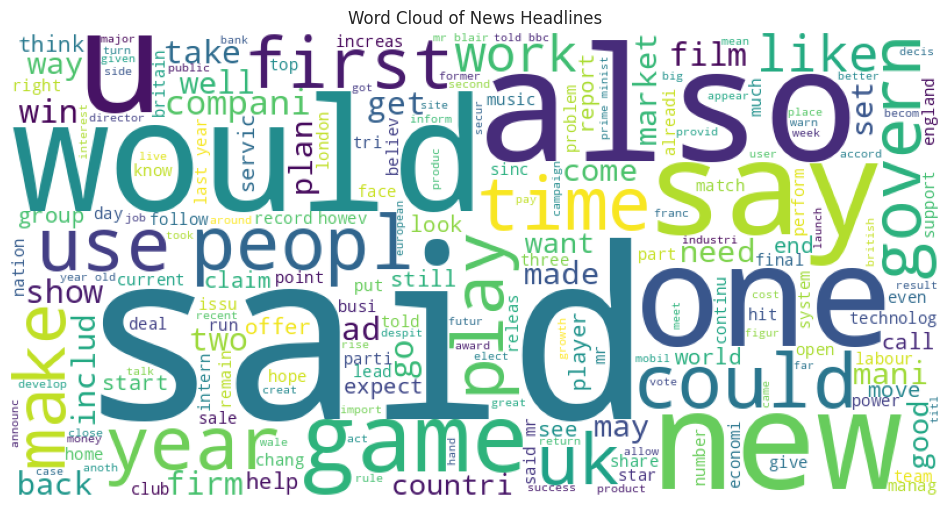

In [ ]:
# Generate word cloud
stopwords_set = set(stopwords.words('english'))
text = df['Text'].astype(str).str.cat(sep=" ")

wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      stopwords=stopwords_set,
                      min_font_size=10).generate(text)

plt.figure(figsize=(12,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of News Headlines')
plt.show()

In [ ]:
def performdatadistribution(df):
  sizes = df['Category'].value_counts()
  labeling = df['Category'].unique()
  explode = [0, 0, 0, 0, 0]
  plt.pie(sizes, explode = explode, autopct="%1.1f%%", labels = labeling, startangle=180)
  plt.title('News Categories')
  plt.tight_layout()
  plt.show()

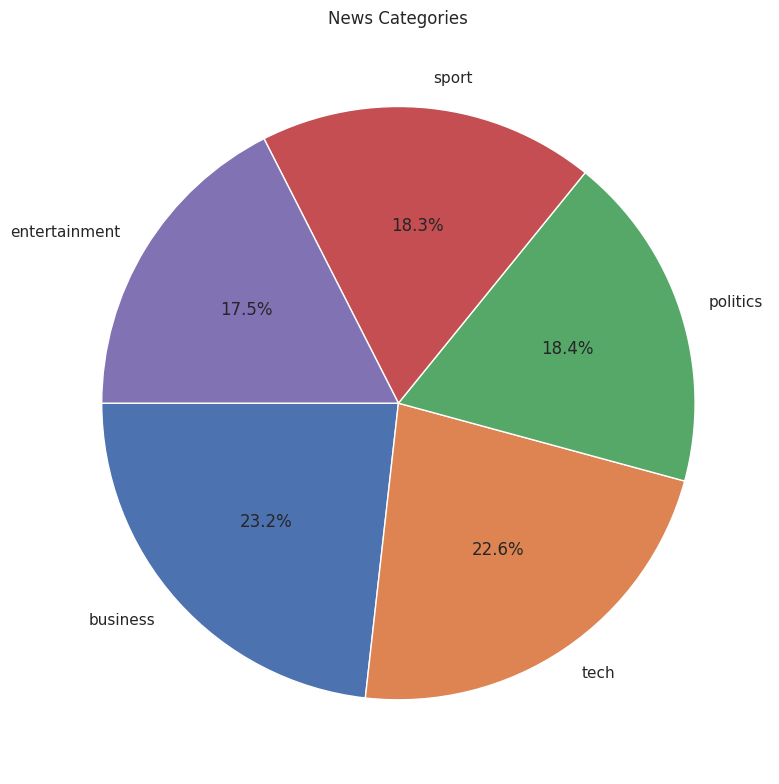

In [ ]:
performdatadistribution(df)

In [ ]:
fig = px.bar(
    df.groupby('Category').agg('count').reset_index().rename({'Text':'count'}, axis=1).sort_values('count', ascending=False),
    x='Category',
    y='count',
    color='Category',
    opacity=1,
    color_discrete_sequence=px.colors.diverging.curl,
    template='seaborn',
    title='Label Distribution',
    width=1000,  # Set width (pixels)
    height=600  # Set height (pixels)
)
fig.show()

Encoding Labels

In [ ]:
# Encoding News Categories
labelencoder = LabelEncoder()
df['Encoded_Category'] = labelencoder.fit_transform(df['Category'])

# Display the mapping
category_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print("Category Encoding Mapping:")
for category, code in category_mapping.items():
    print(f"{category}: {code}")

Category Encoding Mapping:
business: 0
entertainment: 1
politics: 2
sport: 3
tech: 4


In [ ]:
# Redefining Label
encoded = {0: "Business", 1: "Entertainment", 2: "Politics", 3: "Sports", 4: "Technology"}

In [ ]:
# Independent and dependent features
X = df['Text']
y = df['Encoded_Category']

Dataset Splitting

In [ ]:
# Splitting the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=51)

print("Shape of X : " + str(X.shape))
print("Shape of y : " + str(y.shape))
print("Shape of X_train : " + str(X_train.shape))
print("Shape of y_train : " + str(y_train.shape))
print("Shape of X_test : " + str(X_test.shape))
print("Shape of y_test : " + str(y_test.shape))

Shape of X : (1490,)
Shape of y : (1490,)
Shape of X_train : (1117,)
Shape of y_train : (1117,)
Shape of X_test : (373,)
Shape of y_test : (373,)


In [ ]:
# Feature Extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_x_train = tfidf_vectorizer.fit_transform(X_train.values)
tfidf_x_test = tfidf_vectorizer.transform(X_test.values)

In [ ]:
# Create the directory if it doesn't exist
import os
save_path = "/content/drive/MyDrive/Colab Notebooks/pickle_files"
os.makedirs(save_path, exist_ok=True)

In [ ]:
# Saving tfidf_vectorizer
pickle.dump(tfidf_vectorizer, open("/content/drive/MyDrive/Colab Notebooks/pickle_files/tfidf_vectorizer.pkl", "wb"))

In [ ]:
# Multinomial Naive Bayes Classifier with TF-IDF
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_x_train, y_train)

# Saving nb_classifier for tfidf_vectorizer
pickle.dump(nb_classifier, open("/content/drive/MyDrive/Colab Notebooks/pickle_files/nb_classifier.pkl", 'wb'))

In [ ]:
# Prediction with TF-IDF
pred = nb_classifier.predict(tfidf_x_test)

In [ ]:
# Accuracy and Confusion Matrix for TF-IDF
print("Multinomial Naive Bayes : TF-IDF Approach \n")

# Accuracy
a_score = accuracy_score(y_test, pred)
print("Accuracy : " + str("{:.2f}".format(a_score*100)) + '%')

print('\n')

# Confusion matrix
confusion_mat = confusion_matrix(y_test, pred)
print("Confusion Matrix: \n", confusion_mat)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, pred, target_names=labelencoder.classes_))

Multinomial Naive Bayes : TF-IDF Approach 

Accuracy : 96.25%


Confusion Matrix: 
 [[74  0  1  0  0]
 [ 2 69  2  0  5]
 [ 2  0 80  0  0]
 [ 0  0  0 76  0]
 [ 1  1  0  0 60]]

Classification Report:
               precision    recall  f1-score   support

     business       0.94      0.99      0.96        75
entertainment       0.99      0.88      0.93        78
     politics       0.96      0.98      0.97        82
        sport       1.00      1.00      1.00        76
         tech       0.92      0.97      0.94        62

     accuracy                           0.96       373
    macro avg       0.96      0.96      0.96       373
 weighted avg       0.96      0.96      0.96       373



In [ ]:
# Laplace smoothing (Tuning parameter - alpha) for TF-IDF
alphas = np.arange(0, 1, 0.1)

def train_and_predict_tfidf(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_x_train, y_train)
    pred = nb_classifier.predict(tfidf_x_test)
    a_score = accuracy_score(y_test, pred)
    return a_score

# Iterating over alphas and printing the corresponding Accuracy score
print("TF-IDF Approach - Alpha Tuning:")
for alpha in alphas:
    print(f"Alpha: {alpha:.1f}, Accuracy score: {train_and_predict_tfidf(alpha):.4f}")

TF-IDF Approach - Alpha Tuning:
Alpha: 0.0, Accuracy score: 0.3137
Alpha: 0.1, Accuracy score: 0.9705
Alpha: 0.2, Accuracy score: 0.9625
Alpha: 0.3, Accuracy score: 0.9625
Alpha: 0.4, Accuracy score: 0.9625
Alpha: 0.5, Accuracy score: 0.9625
Alpha: 0.6, Accuracy score: 0.9625
Alpha: 0.7, Accuracy score: 0.9651
Alpha: 0.8, Accuracy score: 0.9651
Alpha: 0.9, Accuracy score: 0.9651


In [ ]:
# Feature Extraction with Count Vectorizer (BOW)
count_vectorizer = CountVectorizer()
count_x_train = count_vectorizer.fit_transform(X_train.values)
count_x_test = count_vectorizer.transform(X_test.values)

# Saving count_vectorizer
pickle.dump(count_vectorizer, open("/content/drive/MyDrive/Colab Notebooks/pickle_files/count_vectorizer.pkl", 'wb'))

In [ ]:
# Multinomial Naive Bayes Classifier with BOW
nb_classifier_bow = MultinomialNB()
nb_classifier_bow.fit(count_x_train, y_train)

# Saving nb_classifier for count_vectorizer
pickle.dump(nb_classifier_bow, open("/content/drive/MyDrive/Colab Notebooks/pickle_files/nb_classifier_for_count_vectorizer.pkl", 'wb'))

In [ ]:
# Prediction with BOW
pred_bow = nb_classifier_bow.predict(count_x_test)

In [ ]:
# Accuracy and Confusion Matrix for BOW
print("Multinomial Naive Bayes : BOW Approach \n")

# Accuracy
a_score_bow = accuracy_score(y_test, pred_bow)
print("Accuracy : " + str("{:.2f}".format(a_score_bow*100)) + '%')

print('\n')

# Confusion matrix
confusion_mat_bow = confusion_matrix(y_test, pred_bow)
print("Confusion Matrix: \n", confusion_mat_bow)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, pred_bow, target_names=labelencoder.classes_))

Multinomial Naive Bayes : BOW Approach 

Accuracy : 97.32%


Confusion Matrix: 
 [[73  0  1  0  1]
 [ 1 72  3  0  2]
 [ 1  0 81  0  0]
 [ 0  0  0 76  0]
 [ 0  1  0  0 61]]

Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.97      0.97        75
entertainment       0.99      0.92      0.95        78
     politics       0.95      0.99      0.97        82
        sport       1.00      1.00      1.00        76
         tech       0.95      0.98      0.97        62

     accuracy                           0.97       373
    macro avg       0.97      0.97      0.97       373
 weighted avg       0.97      0.97      0.97       373



In [ ]:
# Laplace smoothing (Tuning parameter - alpha) for BOW
def train_and_predict_bow(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_x_train, y_train)
    pred = nb_classifier.predict(count_x_test)
    a_score = accuracy_score(y_test, pred)
    return a_score

# Iterating over alphas and printing the corresponding Accuracy score
print("BOW Approach - Alpha Tuning:")
for alpha in alphas:
    print(f"Alpha: {alpha:.1f}, Accuracy score: {train_and_predict_bow(alpha):.4f}")

BOW Approach - Alpha Tuning:
Alpha: 0.0, Accuracy score: 0.3137
Alpha: 0.1, Accuracy score: 0.9732
Alpha: 0.2, Accuracy score: 0.9759
Alpha: 0.3, Accuracy score: 0.9786
Alpha: 0.4, Accuracy score: 0.9759
Alpha: 0.5, Accuracy score: 0.9732
Alpha: 0.6, Accuracy score: 0.9732
Alpha: 0.7, Accuracy score: 0.9732
Alpha: 0.8, Accuracy score: 0.9732
Alpha: 0.9, Accuracy score: 0.9732


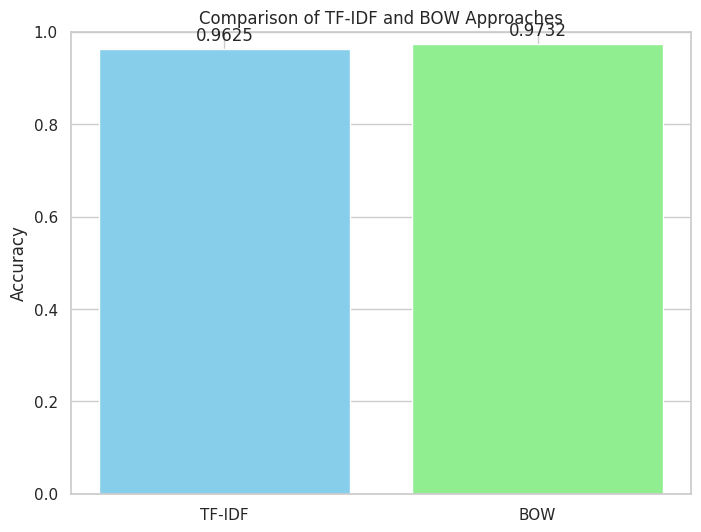

In [ ]:
# Visualize the comparison
approaches = ['TF-IDF', 'BOW']
accuracies = [a_score, a_score_bow]

plt.figure(figsize=(8, 6))
plt.bar(approaches, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Comparison of TF-IDF and BOW Approaches')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')
plt.show()

In [ ]:
# Prediction of user news headline
def predict_news_category(headline):

    # Preprocess the input headline
    tokenized_headline = word_tokenize(headline.lower())
    filtered_headline = [word for word in tokenized_headline
                         if (word not in stop_words) and (word not in punctuations) and (word != "'s")]
    stemmed_headline = [porter.stem(word) for word in filtered_headline]
    processed_headline = " ".join(stemmed_headline)

    # Transform and predict using both approaches
    headline_tfidf = tfidf_vectorizer.transform([processed_headline])
    headline_bow = count_vectorizer.transform([processed_headline])

    prediction_tfidf = nb_classifier.predict(headline_tfidf)
    prediction_bow = nb_classifier_bow.predict(headline_bow)

    return {
        'TF-IDF': encoded[prediction_tfidf[0]],
        'BOW': encoded[prediction_bow[0]]
    }

In [ ]:
# Test with a sample headline
sample_headline = "Apple announces new iPhone with advanced features"
result = predict_news_category(sample_headline)
print(f"Headline: {sample_headline}")
print(f"TF-IDF Prediction: {result['TF-IDF']}")
print(f"BOW Prediction: {result['BOW']}")

Headline: Apple announces new iPhone with advanced features
TF-IDF Prediction: Technology
BOW Prediction: Technology


In [ ]:
# Interactive prediction
user_headline = input("Enter a news headline: ")
result = predict_news_category(user_headline)
print(f"\nTF-IDF Prediction: {result['TF-IDF']}")
print(f"BOW Prediction: {result['BOW']}")

Enter a news headline: Prime Minister Narendra Modi announces Nation Wide Holiday

TF-IDF Prediction: Politics
BOW Prediction: Politics


In [ ]:
# Extended Model Evaluation with Multiple Algorithms
def evaluate_multiple_models(X_train, X_test, y_train, y_test, vectorizer_name):
    models = {
        'MultinomialNB': MultinomialNB(),
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
        'LinearSVC': LinearSVC(random_state=42),
        'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SGDClassifier': SGDClassifier(random_state=42)
    }

    results = []

    for name, model in models.items():
        print(f"Training {name} with {vectorizer_name}...")
        start_time = time()
        model.fit(X_train, y_train)
        training_time = time() - start_time

        start_time = time()
        y_pred = model.predict(X_test)
        prediction_time = time() - start_time

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Model': name,
            'Vectorizer': vectorizer_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Training Time': training_time,
            'Prediction Time': prediction_time
        })

        print(f"Completed {name} with accuracy: {accuracy:.4f}")

    return pd.DataFrame(results)

In [ ]:
# Evaluate models with TF-IDF features
tfidf_results = evaluate_multiple_models(tfidf_x_train, tfidf_x_test, y_train, y_test, 'TF-IDF')

Training MultinomialNB with TF-IDF...
Completed MultinomialNB with accuracy: 0.9625
Training LogisticRegression with TF-IDF...
Completed LogisticRegression with accuracy: 0.9759
Training LinearSVC with TF-IDF...
Completed LinearSVC with accuracy: 0.9759
Training RandomForest with TF-IDF...
Completed RandomForest with accuracy: 0.9651
Training SGDClassifier with TF-IDF...
Completed SGDClassifier with accuracy: 0.9786


In [ ]:
# Evaluate models with BOW features
bow_results = evaluate_multiple_models(count_x_train, count_x_test, y_train, y_test, 'BOW')

Training MultinomialNB with BOW...
Completed MultinomialNB with accuracy: 0.9732
Training LogisticRegression with BOW...
Completed LogisticRegression with accuracy: 0.9678
Training LinearSVC with BOW...
Completed LinearSVC with accuracy: 0.9651
Training RandomForest with BOW...
Completed RandomForest with accuracy: 0.9544
Training SGDClassifier with BOW...
Completed SGDClassifier with accuracy: 0.9705


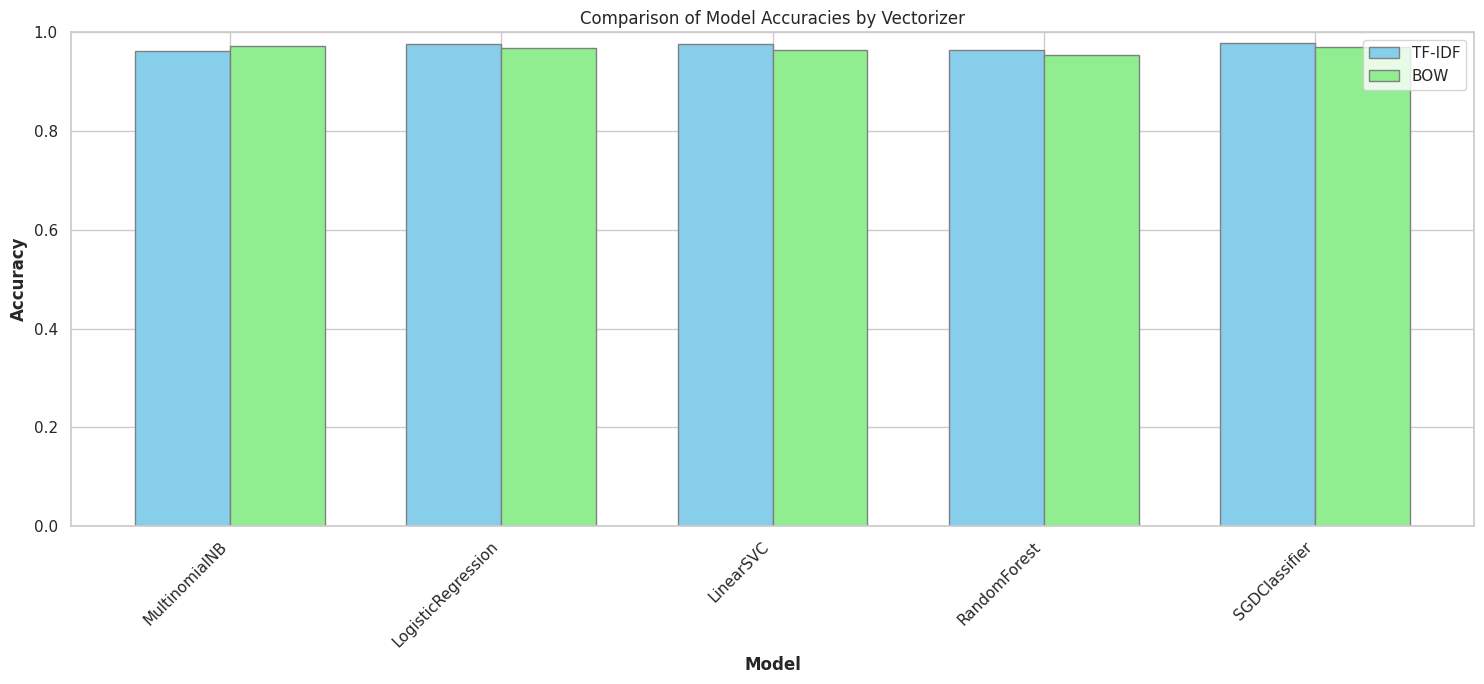

In [ ]:
# Visualize the comparison of all models
plt.figure(figsize=(15, 7))

bar_width = 0.35
r1 = np.arange(len(tfidf_results['Model']))
r2 = [x + bar_width for x in r1]

plt.bar(r1, tfidf_results['Accuracy'], color='skyblue', width=bar_width, edgecolor='grey', label='TF-IDF')
plt.bar(r2, bow_results['Accuracy'], color='lightgreen', width=bar_width, edgecolor='grey', label='BOW')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Comparison of Model Accuracies by Vectorizer')
plt.xticks([r + bar_width/2 for r in range(len(tfidf_results['Model']))], tfidf_results['Model'], rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Model Performance Comparison:")
all_results = pd.concat([tfidf_results, bow_results], ignore_index=True)
all_results.reset_index(drop=True)

Model Performance Comparison:


,Model,Vectorizer,Accuracy,Precision,Recall,F1 Score,Training Time,Prediction Time
0,MultinomialNB,TF-IDF,0.962466,0.963554,0.962466,0.962213,0.006723,0.000850
1,LogisticRegression,TF-IDF,0.975871,0.976138,0.975871,0.975868,1.048568,0.003438
2,LinearSVC,TF-IDF,0.975871,0.976062,0.975871,0.975847,0.119524,0.000855
3,RandomForest,TF-IDF,0.965147,0.965698,0.965147,0.965044,1.595945,0.034555
4,SGDClassifier,TF-IDF,0.978552,0.978949,0.978552,0.978532,0.030544,0.001446
5,MultinomialNB,BOW,0.973190,0.973637,0.973190,0.973085,0.008601,0.001456
6,LogisticRegression,BOW,0.967828,0.968229,0.967828,0.967700,1.204059,0.001492
7,LinearSVC,BOW,0.965147,0.966064,0.965147,0.965116,0.774897,0.001299
8,RandomForest,BOW,0.954424,0.955233,0.954424,0.954172,1.568608,0.034112
9,SGDClassifier,BOW,0.970509,0.970701,0.970509,0.970467,0.040306,0.001445


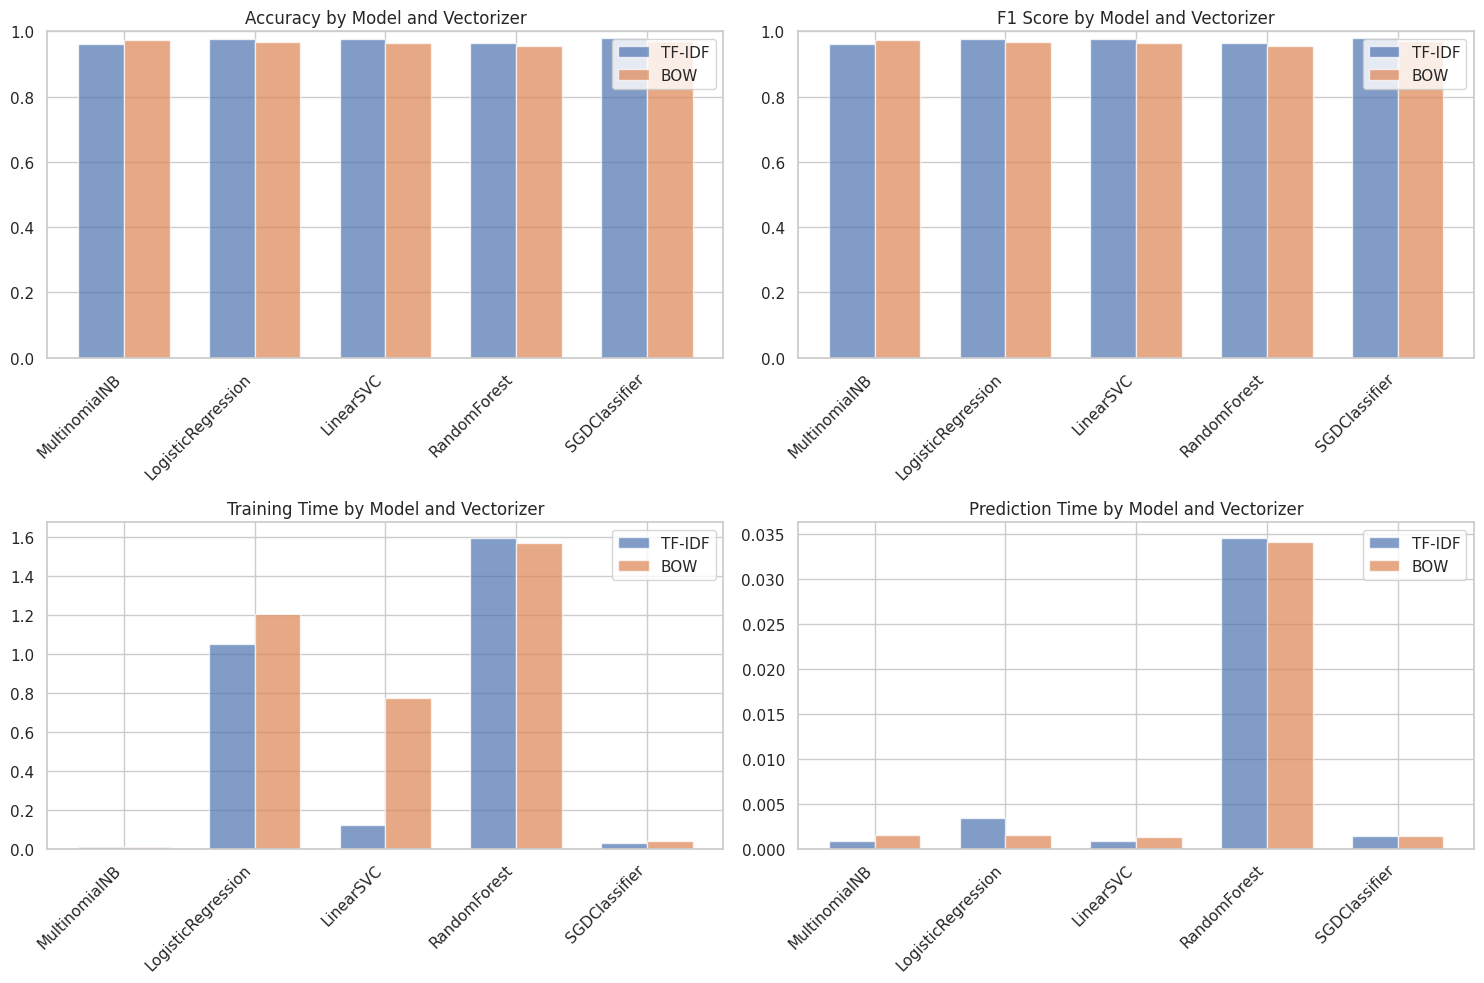

In [ ]:
# Visualize results
plt.figure(figsize=(15, 10))

# Accuracy comparison
plt.subplot(2, 2, 1)
models = all_results['Model'].unique()
x_pos = np.arange(len(models))
width = 0.35

for i, vectorizer in enumerate(['TF-IDF', 'BOW']):
    data = all_results[all_results['Vectorizer'] == vectorizer]
    plt.bar(x_pos + i*width, data['Accuracy'], width, alpha=0.7, label=vectorizer)

plt.title('Accuracy by Model and Vectorizer')
plt.xticks(x_pos + width/2, models, rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)

# F1 Score comparison
plt.subplot(2, 2, 2)
for i, vectorizer in enumerate(['TF-IDF', 'BOW']):
    data = all_results[all_results['Vectorizer'] == vectorizer]
    plt.bar(x_pos + i*width, data['F1 Score'], width, alpha=0.7, label=vectorizer)

plt.title('F1 Score by Model and Vectorizer')
plt.xticks(x_pos + width/2, models, rotation=45, ha='right')
plt.legend()
plt.ylim(0, 1)

# Training Time comparison
plt.subplot(2, 2, 3)
for i, vectorizer in enumerate(['TF-IDF', 'BOW']):
    data = all_results[all_results['Vectorizer'] == vectorizer]
    plt.bar(x_pos + i*width, data['Training Time'], width, alpha=0.7, label=vectorizer)

plt.title('Training Time by Model and Vectorizer')
plt.xticks(x_pos + width/2, models, rotation=45, ha='right')
plt.legend()

# Prediction Time comparison
plt.subplot(2, 2, 4)
for i, vectorizer in enumerate(['TF-IDF', 'BOW']):
    data = all_results[all_results['Vectorizer'] == vectorizer]
    plt.bar(x_pos + i*width, data['Prediction Time'], width, alpha=0.7, label=vectorizer)

plt.title('Prediction Time by Model and Vectorizer')
plt.xticks(x_pos + width/2, models, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Best model identification
best_model_idx = all_results['Accuracy'].idxmax()
best_model = all_results.loc[best_model_idx]
print("Best Performing Model:")
print(best_model)

Best Performing Model:
Model              SGDClassifier
Vectorizer                TF-IDF
Accuracy                0.978552
Precision               0.978949
Recall                  0.978552
F1 Score                0.978532
Training Time           0.030544
Prediction Time         0.001446
Name: 4, dtype: object


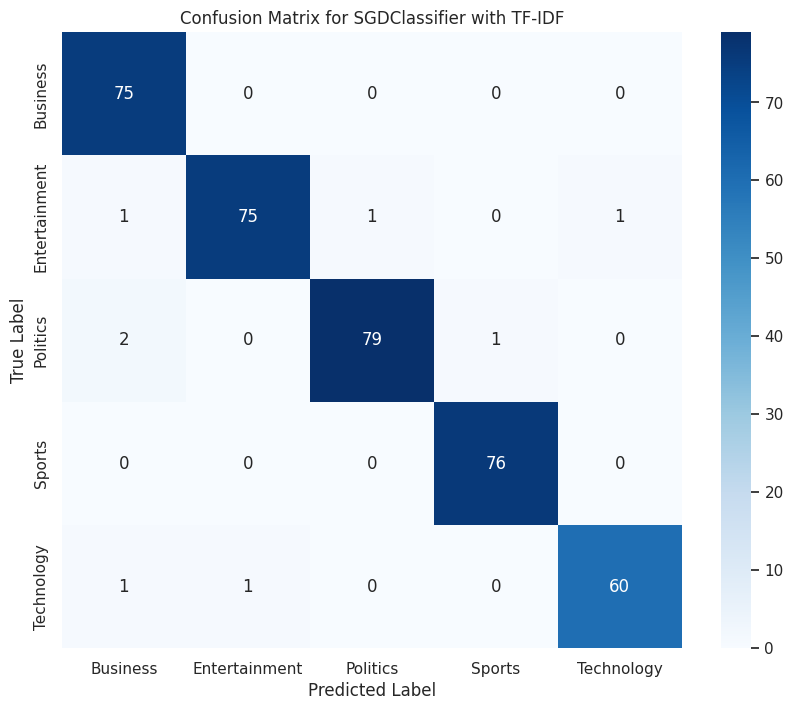

In [ ]:
# Confusion Matrix for the best model
if best_model['Vectorizer'] == 'TF-IDF':
    X_train_best = tfidf_x_train
    X_test_best = tfidf_x_test
    vectorizer = tfidf_vectorizer
else:
    X_train_best = count_x_train
    X_test_best = count_x_test
    vectorizer = count_vectorizer

# Train the best model
if best_model['Model'] == 'MultinomialNB':
    best_model_instance = MultinomialNB()
elif best_model['Model'] == 'LogisticRegression':
    best_model_instance = LogisticRegression(max_iter=1000, random_state=42)
elif best_model['Model'] == 'LinearSVC':
    best_model_instance = LinearSVC(random_state=42)
elif best_model['Model'] == 'RandomForest':
    best_model_instance = RandomForestClassifier(n_estimators=100, random_state=42)
else:
    best_model_instance = SGDClassifier(random_state=42)

best_model_instance.fit(X_train_best, y_train)
y_pred_best = best_model_instance.predict(X_test_best)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoded.values(),
            yticklabels=encoded.values())
plt.title(f'Confusion Matrix for {best_model["Model"]} with {best_model["Vectorizer"]}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_best)
print(f"Classification Report for {best_model["Model"]} with {best_model["Vectorizer"]}:\n", report)

Classification Report for SGDClassifier with TF-IDF:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       0.99      0.96      0.97        78
           2       0.99      0.96      0.98        82
           3       0.99      1.00      0.99        76
           4       0.98      0.97      0.98        62

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373



In [ ]:
# Save the best model
best_model_filename = f"/content/drive/MyDrive/Colab Notebooks/pickle_files/best_model_{best_model['Model']}_{best_model['Vectorizer']}.pkl"
pickle.dump(best_model_instance, open(best_model_filename, 'wb'))
print(f"Best model saved as: {best_model_filename}")

Best model saved as: /content/drive/MyDrive/Colab Notebooks/pickle_files/best_model_SGDClassifier_TF-IDF.pkl


In [ ]:
# Final interactive prediction function using the best model
def predict_news_category_best(headline):
    # Preprocess the input headline
    tokenized_headline = word_tokenize(headline.lower())
    filtered_headline = [word for word in tokenized_headline
                         if (word not in stop_words) and (word not in punctuations) and (word != "'s")]
    stemmed_headline = [porter.stem(word) for word in filtered_headline]
    processed_headline = " ".join(stemmed_headline)

    # Transform using the appropriate vectorizer
    if best_model['Vectorizer'] == 'TF-IDF':
        headline_vectorized = tfidf_vectorizer.transform([processed_headline])
    else:
        headline_vectorized = count_vectorizer.transform([processed_headline])

    # Predict using the best model
    prediction = best_model_instance.predict(headline_vectorized)

    # Return the predicted category string
    return encoded[prediction[0]]

In [ ]:
# Test the best model
try:
    sample_headline = "Microsoft released new Laptop."
    prediction = predict_news_category_best(sample_headline)
    print(f"Headline: {sample_headline}")
    # Use the original category_mapping to get the string label for the prediction
    print(f"Prediction using best model ({best_model['Model']} with {best_model['Vectorizer']}): {prediction}")
except NameError as e:
    print("Error: Some required variables or functions are not defined. Please run all previous cells that define and train the best model, and the prediction function.")
    print(f"Details: {e}")

Headline: Microsoft released new Laptop.
Prediction using best model (SGDClassifier with TF-IDF): Technology


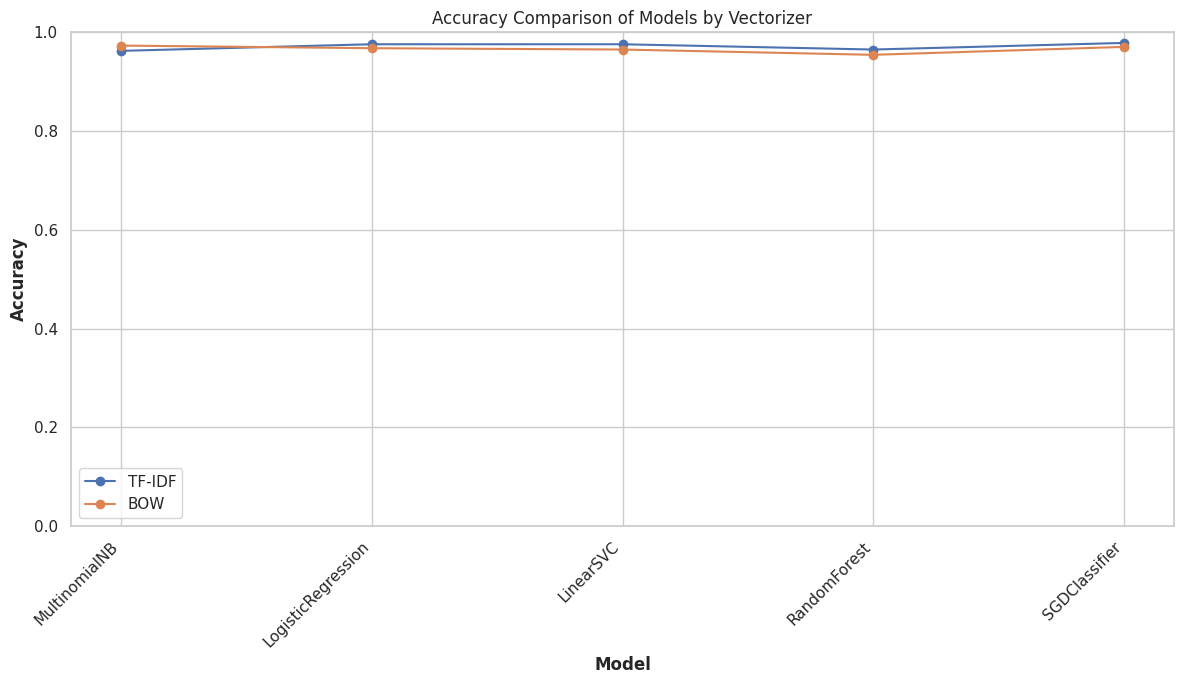

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))

for vectorizer in ['TF-IDF', 'BOW']:
    data = all_results[all_results['Vectorizer'] == vectorizer]
    plt.plot(data['Model'], data['Accuracy'], marker='o', linestyle='-', label=vectorizer)

plt.title('Accuracy Comparison of Models by Vectorizer')
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

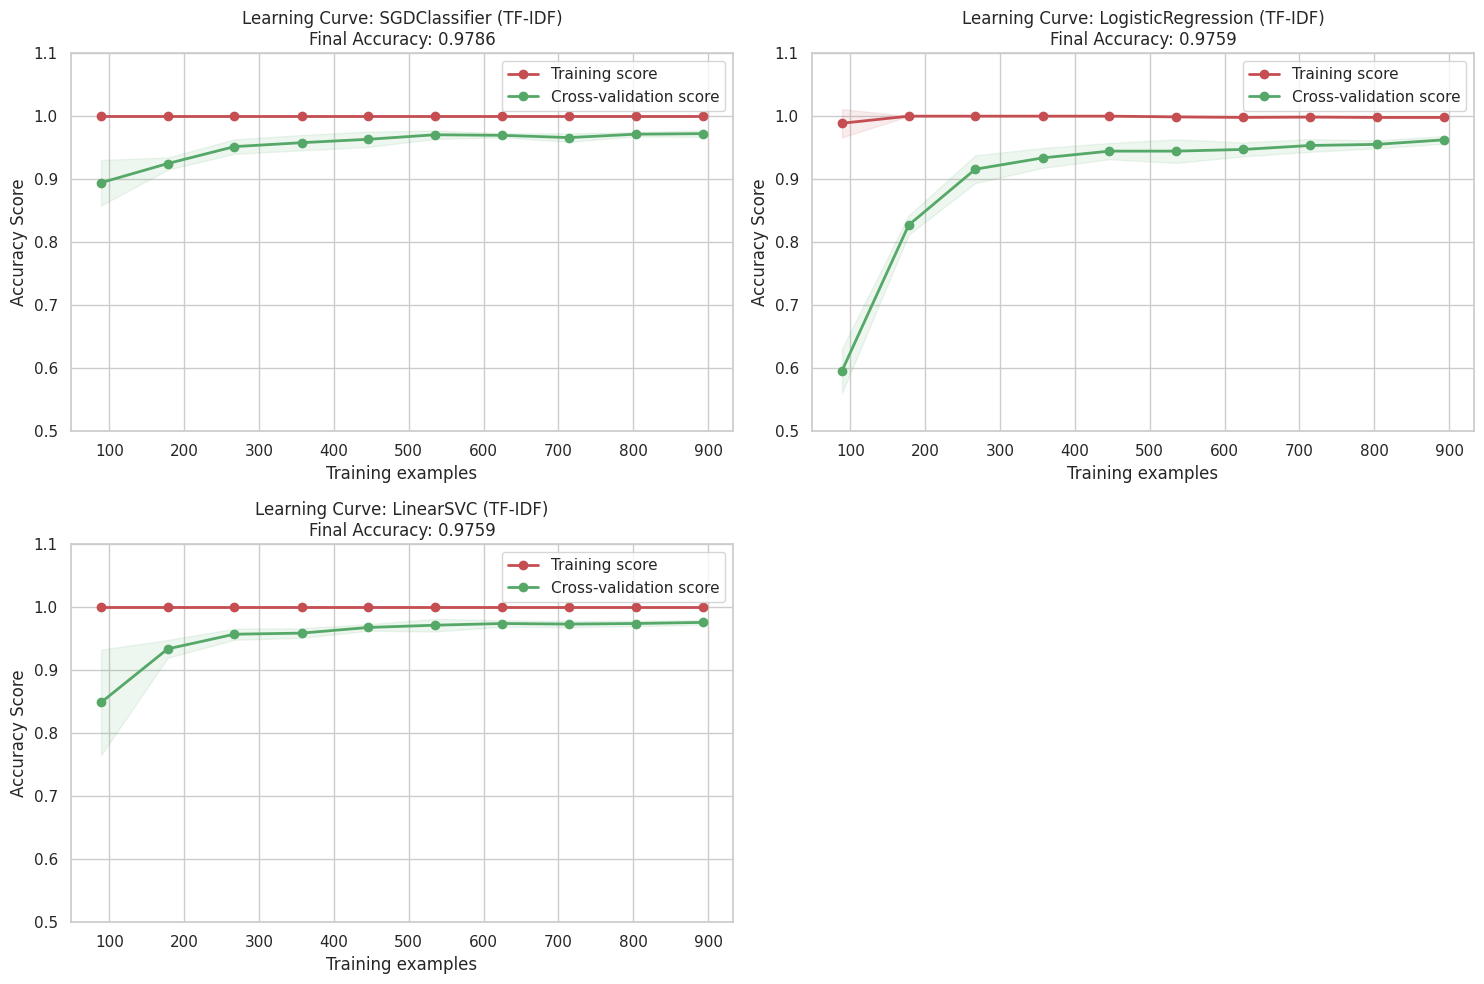

Creating detailed learning curve for:
Model: SGDClassifier
Vectorizer: TF-IDF
Accuracy: 0.9786


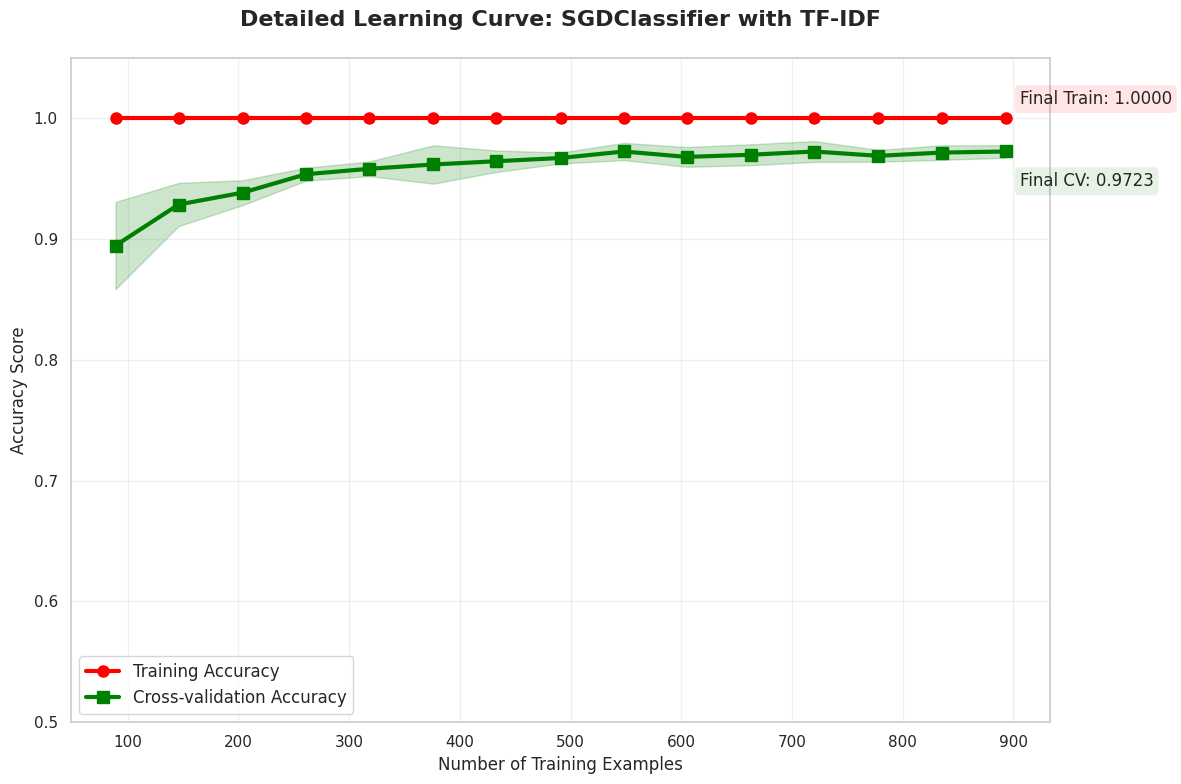


=== Learning Curve Analysis ===
Training score progression: 1.0000 → 1.0000
CV score progression: 0.8944 → 0.9723
Gap between train and CV: 0.0277
Interpretation: Good generalization (small gap between train and CV scores)
Suggestion: Model performance is good


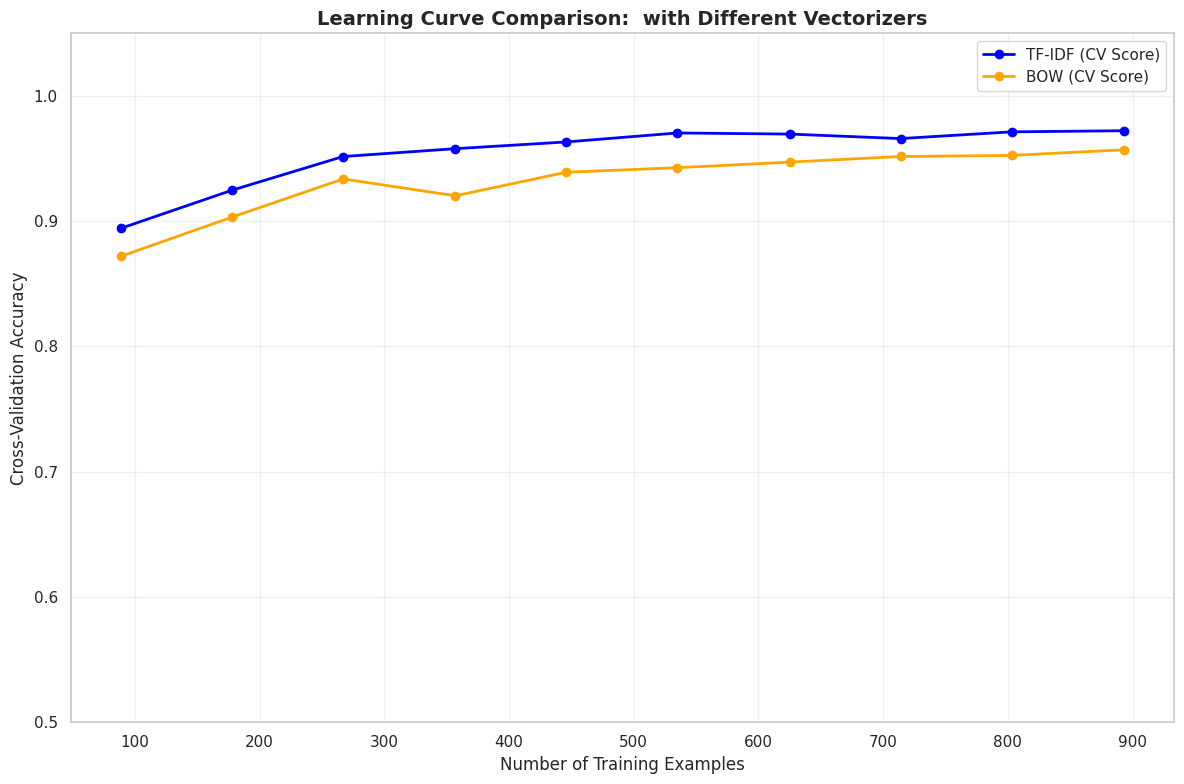

In [ ]:
# Learning Curve Analysis for Best Models
def plot_learning_curves_best_models():
    """
    Plot learning curves for the top performing models from your analysis
    """
    # Get top 3 models based on accuracy
    top_models = all_results.nlargest(3, 'Accuracy')

    plt.figure(figsize=(15, 10))

    for i, (idx, model_info) in enumerate(top_models.iterrows(), 1):
        # Select the appropriate vectorizer
        if model_info['Vectorizer'] == 'TF-IDF':
            X_vectorized = tfidf_x_train
            vectorizer_name = 'TF-IDF'
        else:
            X_vectorized = count_x_train
            vectorizer_name = 'BOW'

        # Initialize the model
        if model_info['Model'] == 'MultinomialNB':
            model = MultinomialNB()
        elif model_info['Model'] == 'LogisticRegression':
            model = LogisticRegression(max_iter=1000, random_state=42)
        elif model_info['Model'] == 'LinearSVC':
            model = LinearSVC(random_state=42, max_iter=1000)
        elif model_info['Model'] == 'RandomForest':
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        else:  # SGDClassifier
            model = SGDClassifier(random_state=42)

        # Generate learning curve data
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_vectorized, y_train, cv=5,
            train_sizes=np.linspace(0.1, 1.0, 10),
            scoring='accuracy', n_jobs=-1, random_state=42
        )

        # Calculate mean and standard deviation
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Create subplot
        plt.subplot(2, 2, i)

        # Plot learning curves
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score", linewidth=2)
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score", linewidth=2)

        # Plot the standard deviation bands
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")

        plt.xlabel("Training examples")
        plt.ylabel("Accuracy Score")
        plt.title(f"Learning Curve: {model_info['Model']} ({vectorizer_name})\nFinal Accuracy: {model_info['Accuracy']:.4f}")
        plt.legend(loc="best")
        plt.grid(True)
        plt.ylim(0.5, 1.1)

    plt.tight_layout()
    plt.show()

# Plot learning curves for best models
plot_learning_curves_best_models()

# Detailed Learning Curve for the Best Performing Model
def plot_detailed_learning_curve_best_model():
    """
    Create a detailed learning curve for the single best performing model
    """
    # Get the best model
    best_model_idx = all_results['Accuracy'].idxmax()
    best_model_info = all_results.loc[best_model_idx]

    print(f"Creating detailed learning curve for:")
    print(f"Model: {best_model_info['Model']}")
    print(f"Vectorizer: {best_model_info['Vectorizer']}")
    print(f"Accuracy: {best_model_info['Accuracy']:.4f}")

    # Select the appropriate vectorizer
    if best_model_info['Vectorizer'] == 'TF-IDF':
        X_vectorized = tfidf_x_train
    else:
        X_vectorized = count_x_train

    # Initialize the model
    if best_model_info['Model'] == 'MultinomialNB':
        model = MultinomialNB()
    elif best_model_info['Model'] == 'LogisticRegression':
        model = LogisticRegression(max_iter=1000, random_state=42)
    elif best_model_info['Model'] == 'LinearSVC':
        model = LinearSVC(random_state=42, max_iter=1000)
    elif best_model_info['Model'] == 'RandomForest':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    else:  # SGDClassifier
        model = SGDClassifier(random_state=42)

    # Generate learning curve data with more points
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_vectorized, y_train, cv=5,
        train_sizes=np.linspace(0.1, 1.0, 15),
        scoring='accuracy', n_jobs=-1, random_state=42
    )

    # Calculate statistics
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Plot main curves
    plt.plot(train_sizes, train_scores_mean, 'o-', color="red",
             label="Training Accuracy", linewidth=3, markersize=8)
    plt.plot(train_sizes, test_scores_mean, 's-', color="green",
             label="Cross-validation Accuracy", linewidth=3, markersize=8)

    # Plot standard deviation areas
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="red")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="green")

    # Customize the plot
    plt.title(f'Detailed Learning Curve: {best_model_info["Model"]} with {best_model_info["Vectorizer"]}\n',
              fontsize=16, fontweight='bold')
    plt.xlabel('Number of Training Examples', fontsize=12)
    plt.ylabel('Accuracy Score', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.ylim(0.5, 1.05)

    # Add final accuracy values to the plot
    final_train_acc = train_scores_mean[-1]
    final_test_acc = test_scores_mean[-1]
    plt.annotate(f'Final Train: {final_train_acc:.4f}',
                 xy=(train_sizes[-1], final_train_acc),
                 xytext=(10, 10), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.1))
    plt.annotate(f'Final CV: {final_test_acc:.4f}',
                 xy=(train_sizes[-1], final_test_acc),
                 xytext=(10, -25), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='green', alpha=0.1))

    plt.tight_layout()
    plt.show()

    # Print analysis
    print("\n=== Learning Curve Analysis ===")
    print(f"Training score progression: {train_scores_mean[0]:.4f} → {train_scores_mean[-1]:.4f}")
    print(f"CV score progression: {test_scores_mean[0]:.4f} → {test_scores_mean[-1]:.4f}")
    print(f"Gap between train and CV: {train_scores_mean[-1] - test_scores_mean[-1]:.4f}")

    # Interpret the results
    gap = train_scores_mean[-1] - test_scores_mean[-1]
    if gap > 0.1:
        print("Interpretation: Possible overfitting (large gap between train and CV scores)")
    elif gap < 0.05:
        print("Interpretation: Good generalization (small gap between train and CV scores)")
    else:
        print("Interpretation: Moderate generalization")

    if test_scores_mean[-1] < 0.8:
        print("Suggestion: Model might benefit from more features or different algorithm")
    else:
        print("Suggestion: Model performance is good")

# Plot detailed learning curve for the best model
plot_detailed_learning_curve_best_model()

# Learning Curve Comparison for TF-IDF vs BOW for the Same Model
def plot_vectorizer_comparison_learning_curve(model_name='LogisticRegression'):
    """
    Compare learning curves for the same model with different vectorizers
    """
    plt.figure(figsize=(12, 8))

    vectorizers = [
        ('TF-IDF', tfidf_x_train),
        ('BOW', count_x_train)
    ]

    colors = ['blue', 'orange']

    for (vec_name, X_data), color in zip(vectorizers, colors):
        # Initialize the model
        if model_name == 'MultinomialNB':
            model = MultinomialNB()
        elif model_name == 'LogisticRegression':
            model = LogisticRegression(max_iter=1000, random_state=42)
        elif model_name == 'LinearSVC':
            model = LinearSVC(random_state=42, max_iter=1000)
        elif model_name == 'RandomForest':
            model = RandomForestClassifier(n_estimators=100, random_state=42)
        else:  # SGDClassifier
            model = SGDClassifier(random_state=42)

        # Generate learning curve data
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_data, y_train, cv=5,
            train_sizes=np.linspace(0.1, 1.0, 10),
            scoring='accuracy', n_jobs=-1, random_state=42
        )

        # Calculate mean scores
        test_scores_mean = np.mean(test_scores, axis=1)

        # Plot the learning curve
        plt.plot(train_sizes, test_scores_mean, 'o-', color=color,
                 label=f'{vec_name} (CV Score)', linewidth=2, markersize=6)

    plt.title(f'Learning Curve Comparison: {model_name} with Different Vectorizers',
              fontsize=14, fontweight='bold')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Cross-Validation Accuracy')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.ylim(0.5, 1.05)
    plt.tight_layout()
    plt.show()

# Compare vectorizers for a specific model (you can change the model name)
plot_vectorizer_comparison_learning_curve()

In [ ]:
# Calculate actual error percentages
cm = confusion_matrix(y_test, y_pred_best)
total_errors = np.sum(cm) - np.trace(cm)

# Assuming category indices: 0=Business, 1=Entertainment, 2=Politics, 3=Sports, 4=Tech
business_politics = cm[0,2] + cm[2,0]
tech_business = cm[4,0] + cm[0,4]
entertainment_tech = cm[1,4] + cm[4,1]

print(f"Total errors: {total_errors}")
print(f"Business↔Politics: {business_politics} ({business_politics/total_errors*100:.1f}%)")
print(f"Technology↔Business: {tech_business} ({tech_business/total_errors*100:.1f}%)")
print(f"Entertainment↔Technology: {entertainment_tech} ({entertainment_tech/total_errors*100:.1f}%)")

Total errors: 8
Business↔Politics: 2 (25.0%)
Technology↔Business: 1 (12.5%)
Entertainment↔Technology: 2 (25.0%)
